In [28]:
# Importing all neccessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris , load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , Ridge , Lasso , LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [12]:
#Loading the data into memory & making an appropriate X matrix and y vector.
diabetes = load_iris()
X = diabetes.data
y = diabetes.target
df = pd.DataFrame(X,columns = diabetes.feature_names)
df['target'] = y
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [13]:
#Splitting the data into 80% training and 20% testing
X_train , X_test , y_train , y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [18]:
#Running logistic regression with L2 regularization, testing different lambda (λ) values: {0, 0.1, 1, 10, 100, 1000}.

lambdas = [0, 0.1, 1, 10, 100, 1000]

train_losses, test_losses = [], []
weight_norms, accuracies_train, accuracies_test = [], [], []
weights_all = []

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(
            penalty='none', solver='lbfgs', max_iter=5000, multi_class='multinomial'
        )
    else:
        C = 1 / lam
        model = LogisticRegression(
            penalty='l2', C=C, solver='lbfgs', max_iter=5000, multi_class='multinomial'
        )
    
    model.fit(X_train, y_train)

    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    
    train_loss = metrics.log_loss(y_train, y_train_pred_proba)
    test_loss = metrics.log_loss(y_test, y_test_pred_proba)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    acc_train = metrics.accuracy_score(y_train, model.predict(X_train))
    acc_test = metrics.accuracy_score(y_test, model.predict(X_test))
    
    accuracies_train.append(acc_train)
    accuracies_test.append(acc_test)
    
    w = model.coef_.ravel()
    weight_norms.append(np.linalg.norm(w, 2))
    
    weights_all.append(w)

weights_all = np.array(weights_all)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


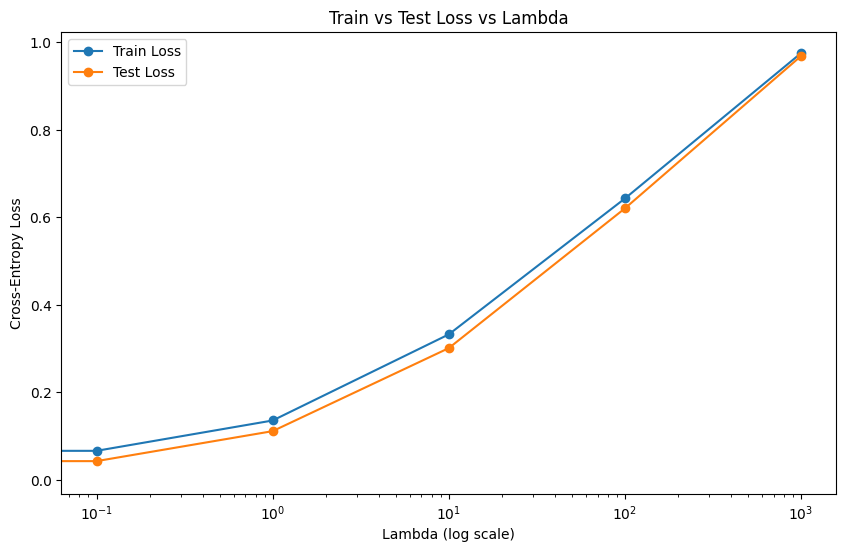

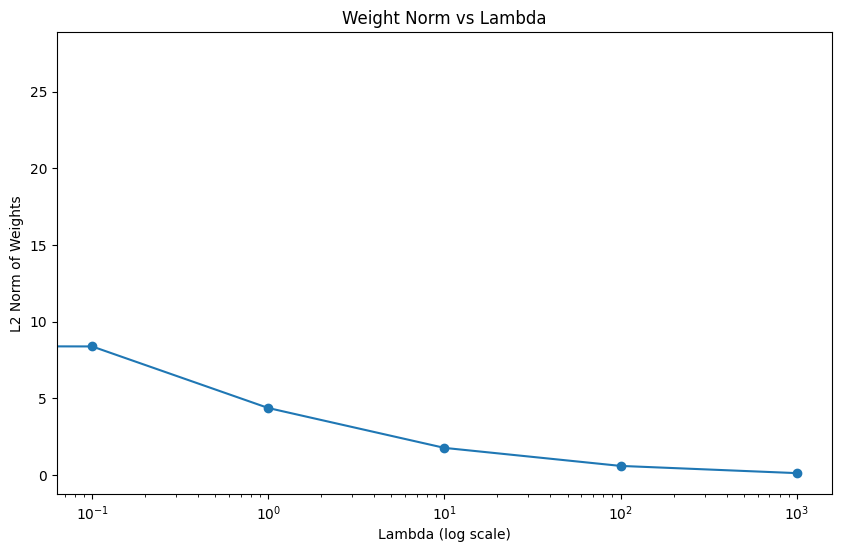

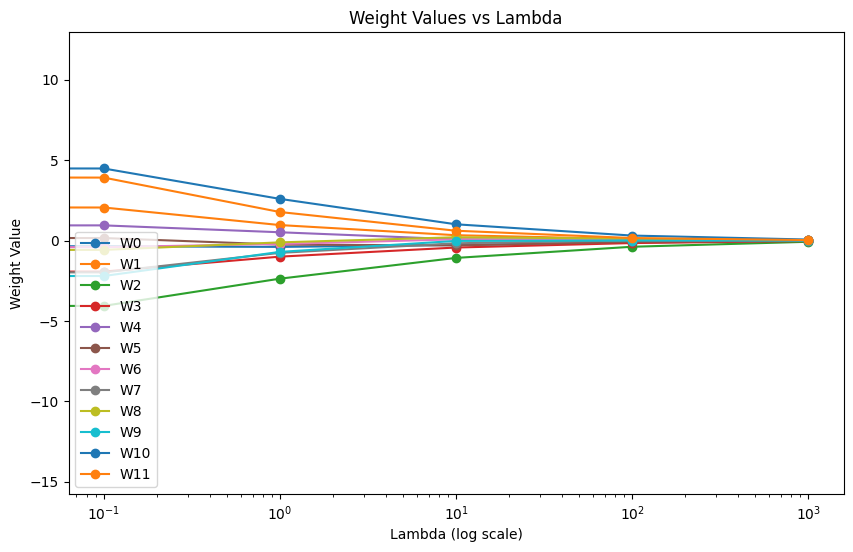

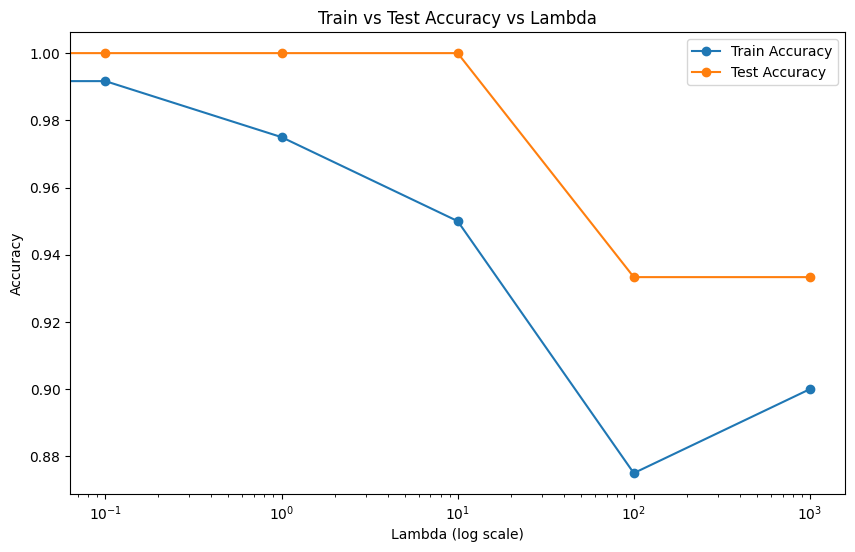

In [25]:
#Plot 1: Cross-entropy loss
plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train vs Test Loss vs Lambda")
plt.legend()
plt.show()

#Training Loss increases with increase in Lambda and test loss may iniatially increases less than training loss but with large increases in lambda it reaches same as training loss

#Plot 2: L2 Norm of Weight Vector
plt.figure(figsize=(10, 6))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs Lambda")
plt.show()

#Norm Decreases with increase in Lambda values

#Plot 3: Actual Weight Values
plt.figure(figsize=(10, 6))
for j in range(weights_all.shape[1]):
    plt.plot(lambdas, weights_all[:, j], marker='o', label=f"W{j}")
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("Weight Value")
plt.title("Weight Values vs Lambda")
plt.legend(loc='best')
plt.show()

# As lambda increases the coefficients reaches 0 it means penalty is working properly

#Plot 4: Accuracy
plt.figure(figsize=(10, 6))
plt.plot(lambdas, accuracies_train, marker='o', label="Train Accuracy")
plt.plot(lambdas, accuracies_test, marker='o', label="Test Accuracy")
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy vs Lambda")
plt.legend()
plt.show()

#Training Accuracy decreases with increases in lambda values and testing accuracy usually stays stable until lambda reaches too large

In [36]:
#Re-formatting the data.
def Gaussian_basis(X,sigma):
    n_samples , n_features = X.shape
    means = np.linspace(-10,10,5)
    reformed_features = []

    for i in range(n_features):
        for m in means:
            re = np.exp(- (X[:, i] - m)**2 / (2 * sigma**2))
            reformed_features.append(re.reshape(-1,1))

    Re = np.hstack(reformed_features)
    Re = np.hstack([np.ones((n_samples, 1)), Re])
    
    return Re

Re = Gaussian_basis(X,1)
print("Original shape:", X.shape)
print("Re-Formated shape:", Re.shape)

Original shape: (150, 4)
Re-Formated shape: (150, 21)


In [39]:
#Experimenting with different sigma values
sigmas = [0.1, 0.5, 1, 5, 10]

for s in sigmas:
    print(f"Sigma = {s} ")
    
    Re = Gaussian_basis(X, s)
    
    X_train, X_test, y_train, y_test = train_test_split(
        Re, y, test_size=0.2, random_state=42
    )
    
    model = LogisticRegression(
        penalty="l2", C=1, solver="lbfgs", max_iter=5000, multi_class="multinomial"
    )
    
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Sigma = 0.1 
Train Accuracy: 0.5667, Test Accuracy: 0.5667
Sigma = 0.5 
Train Accuracy: 0.8250, Test Accuracy: 0.8333
Sigma = 1 
Train Accuracy: 0.8917, Test Accuracy: 0.9333
Sigma = 5 
Train Accuracy: 0.9333, Test Accuracy: 0.9667
Sigma = 10 
Train Accuracy: 0.8917, Test Accuracy: 0.9333


In [46]:
no_model = LogisticRegression(penalty="none", solver="lbfgs", max_iter=5000, multi_class="multinomial")
no_model.fit(X_train, y_train)
normal_train_err = metrics.log_loss(y_train, no_model.predict_proba(X_train))
normal_test_err  = metrics.log_loss(y_test, no_model.predict_proba(X_test))

sigmas = [0.1, 0.5, 1, 5, 10]
train_errors, test_errors = [], []

for s in sigmas:
    Re = Gaussian_basis(X, s)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(
        Re, y, test_size=0.2, random_state=42
    )
    
    model = LogisticRegression(penalty="none", solver="lbfgs", max_iter=5000, multi_class="multinomial")
    model.fit(X_train2, y_train2)
    
    train_err = metrics.log_loss(y_train2, model.predict_proba(X_train2))
    test_err  = metrics.log_loss(y_test2,  model.predict_proba(X_test2))
    
    train_errors.append(train_err)
    test_errors.append(test_err)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:11

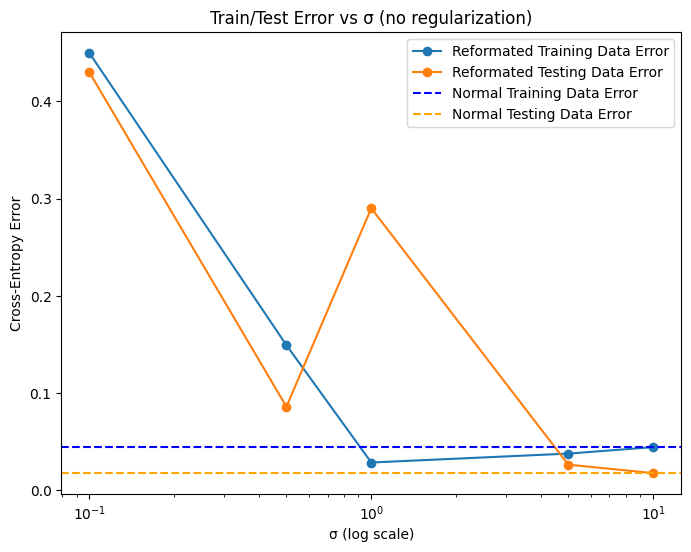

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(sigmas, train_errors, marker='o', label="Reformated Training Data Error")
plt.plot(sigmas, test_errors, marker='o', label="Reformated Testing Data Error")
plt.axhline(normal_train_err, color='blue', linestyle='--', label="Normal Training Data Error")
plt.axhline(normal_test_err, color='orange', linestyle='--', label="Normal Testing Data Error")
plt.xscale("log")
plt.xlabel("σ (log scale)")
plt.ylabel("Cross-Entropy Error")
plt.title("Train/Test Error vs σ (no regularization)")
plt.legend()
plt.show()

# When Aplha is small i.e., 0.1 - 0.5 : Tends to overfit training data , low training error but high test error.
# When Alpha is around 1 : It is very balanced , training error is not too low , but test error is minimized
# When Aplha is large i.e., 5 - 10 : Model becomes smoother.May underfit , both training and test errors increase.

In [52]:
# Adding all sigmas into in big basis  function
def full_basis(X, sigmas=[0.1, 0.5, 1, 5, 10]):
    blocks = []
    for s in sigmas:
        blocks.append(Gaussian_basis(X, s))
    Re = np.hstack(blocks)
    Re = np.hstack([np.ones((X.shape[0], 1)), Re])
    return Re

Re_train = full_basis(X_train, sigmas)
Re_test  = full_basis(X_test, sigmas)

lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]
train_losses, test_losses = [], []
weight_norms = []
sigma_block_norms = {sigma: [] for sigma in sigmas}

for l in lambdas:
    if l == 0:
        model = LogisticRegression(penalty="none", solver="lbfgs", max_iter=5000, multi_class="multinomial")
    else:
        model = LogisticRegression(penalty="l2", C=1/l, solver="lbfgs", max_iter=5000, multi_class="multinomial")
    
    model.fit(Re_train, y_train)
    
    train_loss = metrics.log_loss(y_train, model.predict_proba(Re_train))
    test_loss  = metrics.log_loss(y_test,  model.predict_proba(Re_test))
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    W = model.coef_.ravel()
    weight_norms.append(np.linalg.norm(W, 2))
    
    start = 0
    for s in sigmas:
        block_size = 4 * 5 
        block_weights = W[start:start+block_size]
        sigma_block_norms[s].append(np.linalg.norm(block_weights, 2))
        start += block_size

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


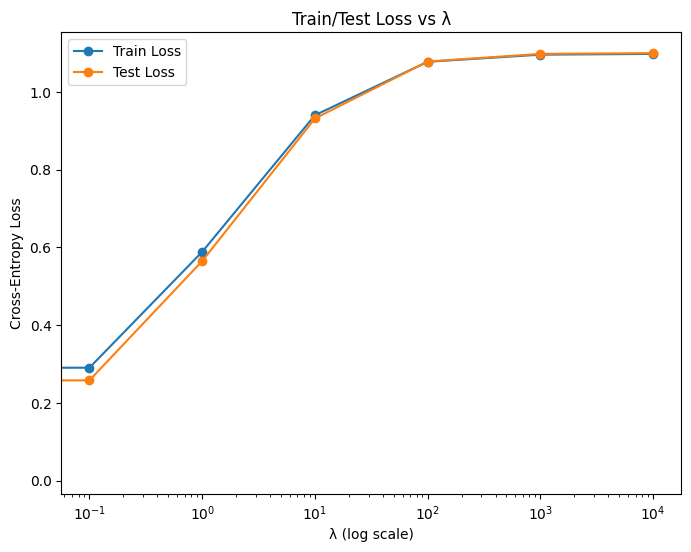

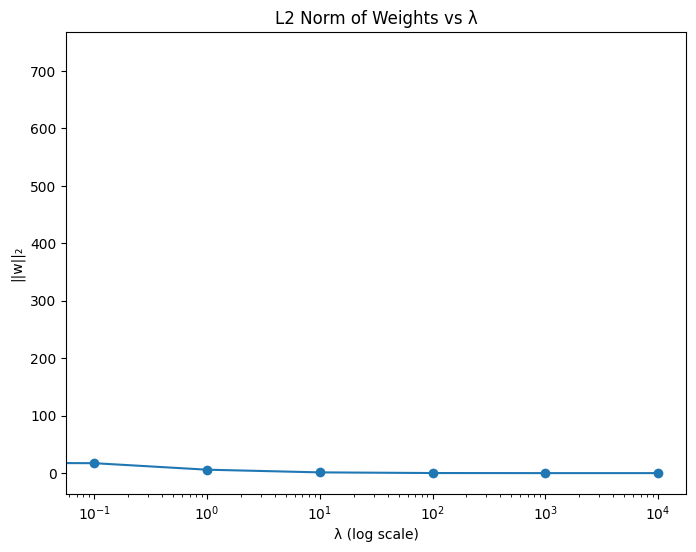

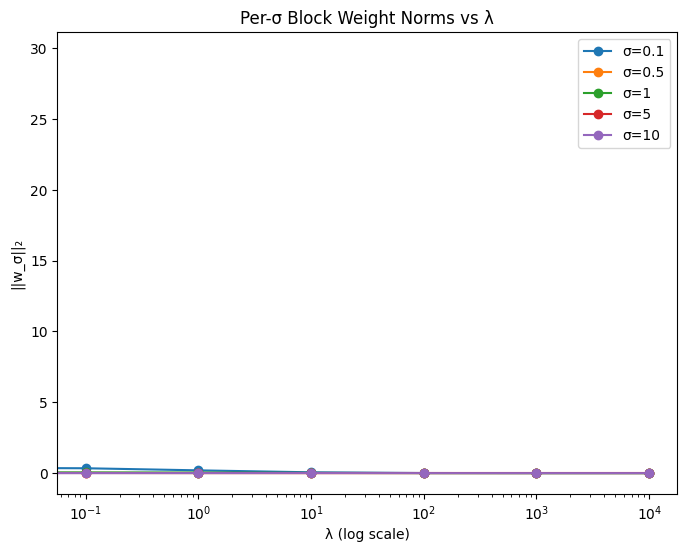

In [53]:
# Train/Test cross-entropy 
plt.figure(figsize=(8,6))
plt.plot(lambdas, train_losses, marker="o", label="Train Loss")
plt.plot(lambdas, test_losses, marker="o", label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train/Test Loss vs λ")
plt.legend()
plt.show()

# For small lambda - model is overfitting , training loss very low , but test is increases
# For larger lambda values - strong regularization shrinks weights , both training and test losses increase (underfitting).

# Total L2 norm of weight vector
plt.figure(figsize=(8,6))
plt.plot(lambdas, weight_norms, marker="o")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||₂")
plt.title("L2 Norm of Weights vs λ")
plt.show()

# As lambda increases, weight norms shrink smoothly.Shows the direct effect of regularization on parameter size.

# Per-Sigma block norms
plt.figure(figsize=(8,6))
for sigma in sigmas:
    plt.plot(lambdas, sigma_block_norms[sigma], marker="o", label=f"σ={sigma}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w_σ||₂")
plt.title("Per-σ Block Weight Norms vs λ")
plt.legend()
plt.show()

# Small sigma blocks tend to have higher weight norms when lambda is small (model overfits with them).As lambda increases, the norms of all sigma-blocks decreases, but usually medium σ (like 1 or 5) contribute the most to generalization.

I would have designed the Gaussian basis functions in such a way that they are multivariate instead of univariate, meaning each basis function would depend on a combination of input variables rather than just one. This can be done by choosing centers (mean vectors) in the multi-dimensional input space and defining Gaussians with covariance matrices that capture how the variables interact. By doing this, the model could capture relationships and interactions between inputs, leading to more expressive decision boundaries. However, this also increases the complexity of the model, which reduces bias but raises variance, so the bias–variance trade-off shifts and the risk of overfitting becomes higher without proper regularization.

So instead of using a fixed set of linspaced basis functions , i would have defined the loss as the data error plus an L2 penalty on the weights. The Gaussian basis functions depend on the centers μi, which are now also learned from data (assuming sigma is fixed). The algorithm would be iterative: (1) initialize μi (e.g., using k-means), (2) fix μi and solve for w with L2-regularized regression, (3) fix w and update μi by gradient descent on the loss, and (4) repeat until convergence. This way both the placement of the basis functions and the weights are adapted to the data, with L2 regularization controlling overfitting.

Yes, the algorithm will converge in the sense that the objective (loss + L2 penalty) is non-increasing across iterations and is bounded below, so the sequence of losses stabilizes.

When μi is fixed, solving for w is a convex problem (logistic with L2/ridge), so we obtain the global optimum for w at that step.

When w is fixed, optimizing over μi is nonconvex, since Gaussian basis functions depend nonlinearly on their centers. Updates here only guarantee a decrease in the objective, not a global optimum.

Because of this alternating structure, the algorithm converges to a stationary point where no further improvement is possible , usually a local minimum or possibly a saddle point.

The final solution therefore depends strongly on the initialization of μi (e.g., k-means). Different runs may end at different local optima.

In summary, the algorithm converges, but in general it achieves only a locally optimal solution, not a globally optimal one.

In order to get the globally optimal one , i would have used tried multiple random restarts with different initial ui and pick up the best solution . By this way we can achieve globall optima by using simple alternating techiniques we can achieve local optima one. 

In [22]:
# Linear Regression
file_path ="/kaggle/input/wine-quality/winequalityN.csv"
df_Re = pd.read_csv(file_path)

columns = df_Re.columns.tolist()
print("Shape:", df_Re.shape)
print("Columns:", columns)
print("First 5 rows:")
display(df_Re.head())

df_Re = pd.get_dummies(df_Re, drop_first=True) 

Shape: (6497, 13)
Columns: ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
First 5 rows:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
# Preprocessing Wine Quality Dataset

null_features = [col for col in df_Re.columns if df_Re[col].isnull().sum()>0]
df_Re.drop(labels=null_features,axis=1,inplace=True)

x_train_w , x_test_w , y_train_w , y_test_w = train_test_split(
    df_Re.drop(labels=['quality'],axis=1),
    df_Re['quality'],
    test_size=0.2,
    random_state=42
)


In [24]:
constant_features = [ cols for cols in df_Re.columns if df_Re[cols].nunique == 1 ]

quasi_constant_feature = []
for feature in x_train_w.columns:
  predominant = (x_train_w[feature].value_counts() / np.float64(len(x_train_w))).sort_values(ascending=False).values[0]
  if predominant > 0.98:
    quasi_constant_feature.append(feature)

duplicated_feat = []
for i in range(0,len(x_train_w.columns)):
  col_1 = x_train_w.columns[i]
  for col_2 in x_train_w.columns[i+1:]:
    if x_train_w[col_1].equals(x_train_w[col_2]):
      duplicated_feat.append(col_2)

print(len(constant_features)+len(quasi_constant_feature)+len(duplicated_feat))

0


In [26]:
results = {}

lr = LinearRegression()
lr.fit(x_train_w, y_train_w)
y_pred_lr = lr.predict(x_test_w)
results['Linear'] = {
    "RMSE": np.sqrt(metrics.mean_squared_error(y_test_w, y_pred_lr)),
    "MAE": metrics.mean_absolute_error(y_test_w, y_pred_lr),
    "R2": metrics.r2_score(y_test_w, y_pred_lr)
}

rdg = Ridge(alpha=1.0)  
rdg.fit(x_train_w, y_train_w)
y_pred_r = rdg.predict(x_test_w)
results['Ridge'] = {
    "RMSE": np.sqrt(metrics.mean_squared_error(y_test_w, y_pred_r)),
    "MAE": metrics.mean_absolute_error(y_test_w, y_pred_r),
    "R2": metrics.r2_score(y_test_w, y_pred_r)
}

ls = Lasso(alpha=0.1)
ls.fit(x_train_w, y_train_w)
y_pred_ls = ls.predict(x_test_w)
results['Lasso'] = {
    "RMSE": np.sqrt(metrics.mean_squared_error(y_test_w, y_pred_ls)),
    "MAE": metrics.mean_absolute_error(y_test_w, y_pred_ls),
    "R2": metrics.r2_score(y_test_w, y_pred_ls)
}

results_df = pd.DataFrame(results).T
print(results_df)

            RMSE       MAE        R2
Linear  0.724205  0.579340  0.266267
Ridge   0.723749  0.582054  0.267189
Lasso   0.738109  0.593947  0.237822


In [37]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "No Regularization": LogisticRegression(penalty='none', solver='lbfgs', max_iter=5000),
    "L1 (Lasso)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000),
    "L2 (Ridge)": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = metrics.classification_report(y_test, y_pred, target_names=data.target_names)
    
    results[name] = {
        "Accuracy": acc,
        "Confusion Matrix": cm,
        "Report": cr
    }
    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)
    print("\n" + "-"*50 + "\n")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


=== No Regularization ===
Accuracy: 0.9210526315789473
Confusion Matrix:
 [[40  2]
 [ 7 65]]
Classification Report:
               precision    recall  f1-score   support

   malignant       0.85      0.95      0.90        42
      benign       0.97      0.90      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114


--------------------------------------------------

=== L1 (Lasso) ===
Accuracy: 0.9912280701754386
Confusion Matrix:
 [[41  1]
 [ 0 72]]
Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        42
      benign       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


--------------------------------------------------

=== L2 (Ridge